#### Fancy Indexing
In fancy Indexing we try to find out the value of individual element.

In [9]:
import numpy as np

a1=np.arange(1,21).reshape(4,5)
print(a1)
print("\n")
#If we want elements [1 3 4 11 16 17]. We cannot use the normal indexing
#    [0,0], 1
#    [0,2], 3
#    [0,3], 4
#    [2,0], 11
#    [3,0], 16
#    [3,1] 17

rows=[0,0,0,2,3,3]
column=[0,2,3,0,0,1]
print(a1[rows,column])   #The fancy indexing will always take the two values rows and columns in 2d
#OR
print("\n")
print(a1[[0,0,0,2,3,3],[0,2,3,0,0,1]])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


[ 1  3  4 11 16 17]


[ 1  3  4 11 16 17]


In [10]:
#If I want 0th row, 2nd row and 3rd row with all the columns. Again we cannot use the normal indexing
#Fancy Indexing

print(a1[[0,2,3],:])
#In fancy indexing we create a list[ ] and privde the values that we need. 

[[ 1  2  3  4  5]
 [11 12 13 14 15]
 [16 17 18 19 20]]


In [12]:
a1=np.arange(1,21).reshape(4,5)
print(a1)

#if I want 1st,2nd,3rd row

print("\n")
print(a1[[1,2,3],:])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


[[ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


In [14]:
#Boolean Indexing

a=np.random.randint(low=1,high=100,size=24).reshape(6,4)
print(a)

[[38 55 27 13]
 [65 33 37 90]
 [84 30 34 64]
 [89 53 41 88]
 [74 17 51 33]
 [63 59 50 85]]


In [19]:
#Find all the numbers that are greater than 50
print(a>50)

#Now, boolean array can be used as a mask. We just have use put the boolean array back to our 2d vector. Then, where the boolean vector is True,
#It will only display those results.
print("\n")
print(a[a>50])

[[False  True False False]
 [ True False False  True]
 [ True False False  True]
 [ True  True False  True]
 [ True False  True False]
 [ True  True False  True]]


[55 65 90 84 64 89 53 88 74 51 63 59 85]


In [22]:
#Find out even numbers
print(a%2==0)
print("\n")
print(a[a%2==0])

[[ True False False False]
 [False False False  True]
 [ True  True  True  True]
 [False False False  True]
 [ True False False False]
 [False False  True False]]


[38 90 84 30 34 64 88 74 50]


In [25]:
#Find all the numbers that are greater than 50 and are even
a[(a>50)&(a%2==0)]   #If we have two conditions, we just have to use the bitwise &. 

array([90, 84, 64, 88, 74], dtype=int32)

In [24]:
#Find all the numbers not divisible by 7
a[a%7!=0]

array([38, 55, 27, 13, 65, 33, 37, 90, 30, 34, 64, 89, 53, 41, 88, 74, 17,
       51, 33, 59, 50, 85], dtype=int32)

### Broadcasting
- It is a term which describe how numpy treats arrays with different shapes during arithmetic operation. 
- The smaller array is broadcast across the larger array so that they have compatible shapes. 

In [26]:
#For example- As we know, that matrix operations such as +,-,*, / only happens when the shape of two matrix is same. Such as (5,5)+(5,5) or
#(4,3)-(4,3). If one of them is different then matrix operation won't happen. 
#But broadcasting help in such situations.

#### Important rules for Broadcasting

The shape of both the array either should be equal or one of them should have 1 in there shape. Broadcasting always starts from 
right to left. The python checks, whether the shape is equal or not, if it has one then it will broadcast the smaller array to the size of 
larger array.

For example - (5,5) and (5,) -> Now, Python convert (5,) to (1,5) and check from right to left. 5=5 yes, 1!=5 but 1 can be broadcast into 5. 
Hence, the new shape for the smaller array would be (5,5) and now numpy can perform the arithmetic operation on the both the arrays. 

If we have a 3d array (3,3,3) and (3,)-> Then, it will get converted into (1,1,3)

In [27]:
#Example for Broadcasting 

a=np.arange(6).reshape(2,3)
b=np.arange(3).reshape(1,3)

a+b
#The addition would be possible with the help of broadcasting. First broadcasting will match the shape. 3=3 , 2!=1. But, as it is 1, so broadcasting
#will convert the 1 to 2. Now, shapes are matched and broadcasting will do the normal matrix addition. 

array([[0, 2, 4],
       [3, 5, 7]])

### Rule of Broadcasting

1. Make the two arrays have the same number of dimensions.

- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the
smaller dimension.

2. Make each dimension of the two arrays the same size.

- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other
array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

In [31]:
#some examples
a =np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [32]:
a =np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)
print(a+b) #This will throw an error because even if (3,) can be converted into (1,3) -> Shapes will still not match from the right to left
#i.e (1,3)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [33]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)
print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [35]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)
print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [36]:
a = np. array( [1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)
print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [38]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)
print(a+b)  #Broadcasting will not work. 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [39]:
#Working with mathematical formule

a1=np.array([1,3,8,12])
print(np.sin(a1))   #Trigonometry 

[ 0.84147098  0.14112001  0.98935825 -0.53657292]


Sigmoid function - Returns the value b/w 1 and 0
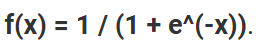

In [40]:
def sigmoid(arr):
    return 1/(1+np.exp(-(arr)))

arr=np.arange(20).reshape(4,5)
print(sigmoid(arr))

[[0.5        0.73105858 0.88079708 0.95257413 0.98201379]
 [0.99330715 0.99752738 0.99908895 0.99966465 0.99987661]
 [0.9999546  0.9999833  0.99999386 0.99999774 0.99999917]
 [0.99999969 0.99999989 0.99999996 0.99999998 0.99999999]]


In [42]:
#Mean Square Error - It is the square of the difference b/w actual and predicted value and finally average of all the values

actual=np.random.randint(low=1,high=50,size=25)
predicted=np.random.randint(low=1,high=50,size=25)


def mse(actual,predicted):
    return np.mean((actual-predicted)**2)

mse(actual,predicted)

np.float64(317.6)

In [52]:
#Working with missing values

#An important thing to remember. In numpy nan and nun values are different. Whenever we are talking about missing values, we are talking about
#nan values

a1=np.array([1,2,3,4,np.nan,5,6])
print(a1)
#now we want to remove this nan value
a1[~np.isnan(a1)]  #np.isnan() will tell whether the value inside the array is nun or not. It creates a boolean array. So, using np,isnan we can get
#all the nun values. But we want the values which are not nun, so we will put ~ it means not.So, give us all the values that are ~ (not) nun.

[ 1.  2.  3.  4. nan  5.  6.]


array([1., 2., 3., 4., 5., 6.])

In [54]:
#Plotting a Graph 

x=np.linspace(-10,10,100)
print(x)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [55]:
y=x
print(y)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [57]:
!pip install --upgrade matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------- ----------- 5.8/8.1 MB 32.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 31.2 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 28.0 MB/s  0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------

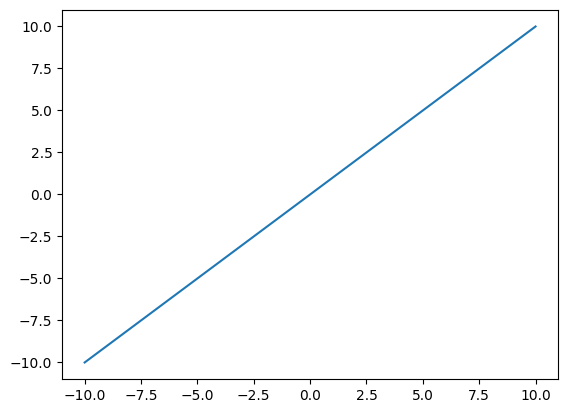

In [63]:
import matplotlib
from matplotlib import pyplot as plt

plt.plot(x,y)  #plot is a method of pyplot which take two arguments x and y,(both should be of same size) and plot a graph b/w them

In [67]:
#Parabola

x=np.linspace(-10,10,10)
print(x)
print("\n")
y=x**2
print(y)

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]


[100.          60.49382716  30.86419753  11.11111111   1.2345679
   1.2345679   11.11111111  30.86419753  60.49382716 100.        ]


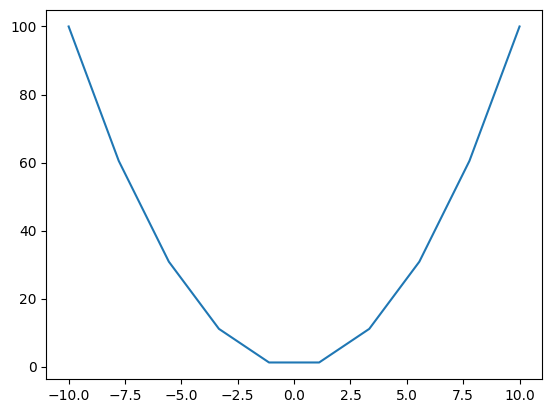

In [68]:
plt.plot(x,y)

In [69]:
#y=sin(x)
x=np.linspace(-10,10,10)
print(x)
print("\n")
y=np.sin(x)
print(y)

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]


[ 0.54402111 -0.99709789  0.66510151  0.19056796 -0.8961922   0.8961922
 -0.19056796 -0.66510151  0.99709789 -0.54402111]


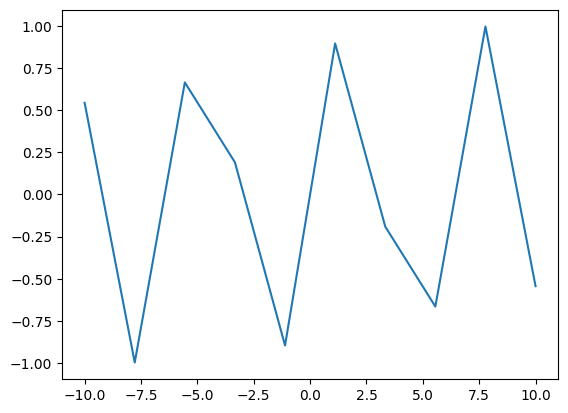

In [70]:
plt.plot(x,y)

In [84]:
#y=xlog(x)
x=np.linspace(-10,10,50)
print(x)
print("\n")
y=x*np.log(x)
print(y)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


[            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
            

C:\Users\Abhi\AppData\Local\Temp\ipykernel_23620\2935642868.py:5: RuntimeWarning: invalid value encountered in log
  y=x*np.log(x)


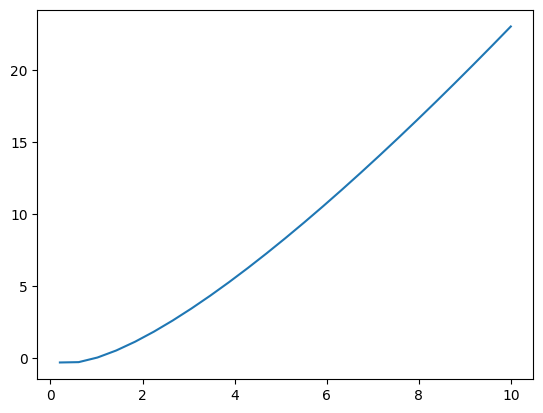

In [85]:
plt.plot(x,y)

In [89]:
x=np.linspace(-10,10,100)
print(x)
print("\n")
y=sigmoid(x)   #The sigmoid function we created
print(y)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

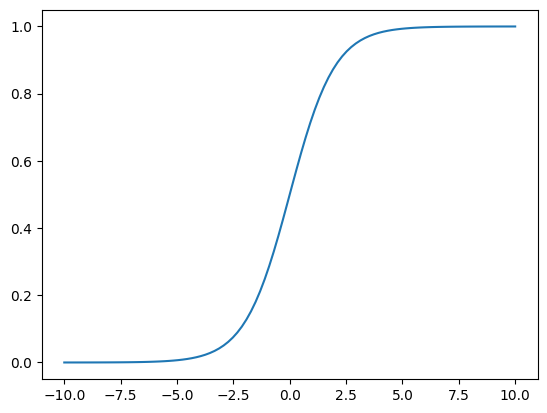

In [90]:
plt.plot(x,y)